In [2]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file
df = pd.read_excel("fdssecond.xlsx")  # Adjust the file path

# Combine all comments into a single string
text_data = ' '.join(df['COMMENTS'].astype(str).tolist())  # Assuming the column is named 'COMMENT'

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 2: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)
print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Step 3: Derive Knowledge Graph
edges = []
entities = set()

# Collect edges and unique entities
for ent in doc.ents:
    edges.append((ent.text, ent.label_))
    entities.add(ent.text)

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph with improved spacing and layout
plt.figure(figsize=(15, 10))  # Increase figure size for better spacing

# Use spring layout with a larger k value for more node spacing
pos = nx.spring_layout(graph, k=1.5, iterations=100)

# Get node sizes based on their degree (number of connections)
node_sizes = [1000 + 100 * graph.degree(node) for node in graph.nodes()]

# Draw nodes and edges
nx.draw(graph, pos, with_labels=False, node_color='skyblue', node_size=node_sizes,
        edge_color='gray', font_size=8, font_color='black')

# Draw labels separately to avoid overlap, set font size smaller
nx.draw_networkx_labels(graph, pos, font_size=10)

plt.title('Knowledge Graph with Enhanced Readability')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
ram: 1750
mandir: 1319
ayodhya: 446
temple: 414
cultural: 290
completion: 227
local: 198
jai: 194
proud: 182
faith: 181

Named Entities:
Hindu - NORP
Jai Modi - PERSON
Mandir - ORG
Indian - NORP
Indian - NORP
Hindus - NORP
first - ORDINAL
Jai Shree Ram - PERSON
Indian - NORP
Incredible India!!Jaii - ORG
Ram Ji - PERSON
500 years - DATE
Hindus - NORP
tomorrow - DATE
Indians - NORP
india - GPE
some years - DATE
Looks like Devaloka - ORG
500 year back - DATE
india - GPE
Tomorrow - DATE
Indian - NORP
India - GPE
many many years - DATE
Jai Shree Ram Funny - PERSON
Devotes - ORG
Religion - PERSON
Goosebumps - PERSON
RAM - ORG
May - DATE
Hare Rama Hare Krishna - PERSON
Jai Sree Ram Other - PERSON
Magnificent Looks - PERSON
Delhi - GPE
Indian - NORP
nagara style - PERSON
indian - NORP
South indian - NORP
Kerala - GPE
The Temple...pran - ORG
10000times - CARDINAL
GRAND - ORG
Jai shree Ram Jai Bajrangbali - PERSON
Jai shree Ram - PERSON
Hindu Muslim - NORP
Mr pm Modi - WORK_OF_ART


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


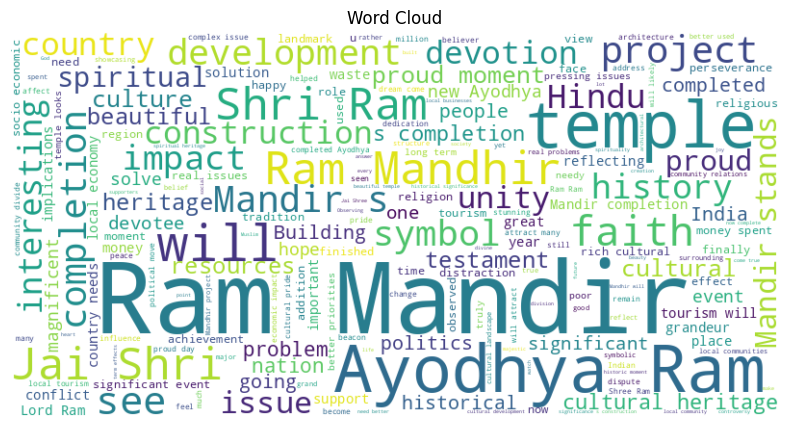

In [3]:
# @title Default title text
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [4]:
from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
  print(f"{' '.join(bigram)}: {count}")


Top 10 Bigrams:
ram mandir: 1308
ayodhya ram: 397
ram mandhir: 174
jai shri: 162
shri ram: 161
mandir completion: 102
ram ram: 98
mandir stands: 76
proud moment: 70
cultural heritage: 61


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
csv_file = 'fdssecond.xlsx'
df = pd.read_excel(csv_file)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['COMMENTS'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
    10  100  1000  10000times  1400  1500  1800  2000  2024   22  ...  \
0  0.0  0.0   0.0         0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
1  0.0  0.0   0.0         0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2  0.0  0.0   0.0         0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
3  0.0  0.0   0.0         0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
4  0.0  0.0   0.0         0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   

   wrenches  written  wrong  yeah  year  years  yes  yogi  youral  yrs  
0       0.0      0.0    0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0  
1       0.0      0.0    0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0  
2       0.0      0.0    0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0  
3       0.0      0.0    0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0  
4       0.0      0.0    0.0   0.0   0.0    0.0  0.0   0.0     0.0  0.0  

[5 rows x 2004 columns]
